In [1]:
import spectral

In [2]:
import numpy as np
from spectral import contrast as sc

In [3]:
data = sc.simulate_recording(nchans=10, nsamples=2000, nepochs=10, fs=1000, nperseg=640, noverlap=480, seed=42)
y = [0,0,0,0,0, 1,1,1,1,1]
print(data.shape)

(10, 2000, 10)


In [4]:
snr, f = sc.contrast(data, y)

Obtain normalization array...
calculating stft...
normalizing matrices... this may take a few minutes...
obtaining snr...


<ipython-input-5-90e21aff6db5>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(snr), origin='lower')


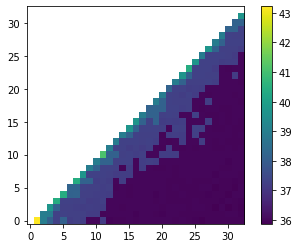

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.log(snr), origin='lower')
plt.colorbar()